### <span style="color:pink; font-weight:bold"> CURSO - Estatística com Python: frequências e medidas</span>

#### <span style="color:pink; font-weight:bold"> Introdução</span>

#### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

Neste curso básico, veremos os principais tópicos voltados principalmente às Estatísticas Descritivas, as quais compõe a primeira fase de um processo de análise completo dos dados:

    Conhecendo os Dados;
    Distribuição de Frequências;
    Medidas de Tendência Central;
    Medidas Separatrizes;
    Medidas de Dispersão.

#### Importando pandas e lendo o dataset do projeto

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/home/ba/Documentos/data-science/curso3_estatistica_com_python1/dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


#### Tipos de dados

Classificaremos os dados entre basicamente dois tipos: qualitativos e quantitativos. O primeiro expressa uma qualidade ou atributo dos dados, enquanto o segundo faz contagens e mensurações.  

A partir do nosso DataFrame; UF é bastante simples de classificarmos como qualitativo, pois não é uma contagem, e o mesmo vale para Sexo e Cor. Enquanto a Idade, Renda e Altura são quantitativos. Anos de Estudo é uma variável de dados qualitativos também, afinal cada código numérico representa uma classe. Veremos isso no caso de 16 ser relativo a 15 anos ou mais, e 0 como Sem instrução e menos de 1 ano por exemplo.  

Cada classificação pode ser dividida em duas categorias. No caso dos qualitativos, teremos os ordinais e nominais.

Já os quantitativos se dividem em discretos e contínuos. 

##### Variáveis qualitativas ordinais

As variáveis Sexo, Cor e UF não são ordinais pois não podemos hierarquiza-las, cada código foi atribuido sem uma ordem lógica.

No caso de "Anos de estudo" é possível fazer uma ordenação, então podemos classifica-lo como qualitativo ordinal.

In [3]:
dados['Anos de Estudo']

0        12
1        12
2        15
3         6
4         9
         ..
76835    11
76836     7
76837    12
76838     4
76839     4
Name: Anos de Estudo, Length: 76840, dtype: int64

In [4]:
# aplicamos .unique() para vermos apenas os valores únicos

dados['Anos de Estudo'].unique()

array([12, 15,  6,  9, 14, 16, 10,  1,  5,  7,  3,  2,  4,  8, 11, 17, 13])

Como resultado temos um array() fora de ordenação. Para ordenarmos os dados adcionaremos a building function do python chamada sorted() que receberá todo o conteúdo dessa célula.

In [5]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

Através disso, visualizamos a lista de valores do dicionário de "Anos de Estudo", comprovando que se trata de uma variável qualitativa ordinal.

##### Variáveis qualitativas nominais

Agora, vamos ver as qualitativas nominais:

In [6]:
sorted(dados['Sexo'].unique())

[0, 1]

In [7]:
sorted(dados['Cor'].unique())

[0, 2, 4, 6, 8]

In [8]:
sorted(dados['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

Com isso, vemos a numração do código atribuída pelos profissionais do IBGE. Estes valores não podem ser hierarquizados para serem ordenados, o qua as classificam como qualitativas nominais.

##### Variáveis quantitativas discretas

Poderemos classificar a Idade de diversas formas, dependendo de como é representada no dataset; em nosso caso, esta representa uma contagem composta por números inteiros.

Quando a pesquisa é feita pelo IBGE, os entrevistadores perguntam quantos anos completos a pessoa tem, sem contar meses e dias.

Na parte homônima do nosso notebook, escreveremos dados com Idade que pode ser aplicada em diversas operações, como min() por exemplo.

In [9]:
dados.Idade.min()

13

In [10]:
dados.Idade.max()

99

In [11]:
print('De %s até %s anos' % (dados.Idade.min(), dados.Idade.max()))

De 13 até 99 anos


Portanto, esta variável pode ser contada e ordenada, além de ser de fato uma quantitativa discreta com os anos completos.

Também poderia ser quantitativa contínua, pois é possível representarmos idades exatas que computem os meses e dias além dos anos, gerando números fracionados e reais.

A variável Idade seria qualitativa ordinal se fosse inserida em intervalos, como em casos onde faixas etárias são relevantes e podem ser ordenadas por exemplo.

##### Variáveis quantitativas contínua

Como a Renda veio da fonte do IBGE sem a contagem de centavos, criamos a variável Altura justamente para vermos um exemplo com casas decimais.

Logo, esta última é classificada como quantitativa contínua. Aplicaremos o mesmo comando anterior na célula desta parte, alterando somente o nome da variável para Altura e a unidade de medida para metros dentro de print.

In [12]:
print('De %s até %s metros' % (dados.Altura.min(), dados.Altura.max()))

De 1.339244614 até 2.028496765 metros


Com isso, veremos o intervalo entre o valor mínimo e o máximo da variável Altura medido em metros.

Se escrevermos ['Altura'] ao invés de somente Altura para pegarmos seus dados, o resultado será igual.

In [13]:
print('De %s até %s metros' % (dados['Altura'].min(), dados['Altura'].max()))

De 1.339244614 até 2.028496765 metros


Em resumo, teremos a variável qualitativa ordinal Anos de Estudo e as qualitativas nominais Sexo, Cor e UF, bem como a quantitativa discreta Idade e a quantitativa contínua Altura.

#### DIstribuição de frequências

Fazendo análise descritiva do conjunto de dados.

Vamos começar com uma técnica de sumarização para entendermos como as variáveis se distribuem. vendo se são assimétricas ou se são distribuídas normalmente, se conseguiremos detectar outlier, ou se rpecisam de algum tipo de transformação por exemplo.

São técnicas de estatísticas que lidam com um conjunto de variáveis e buscam conhecer seus comportamentos, passando primeiro por formas gráficas chamadas histogramas que auxiliam na análise da Distribuição de Frequências nos dados.

Fazendo uma contagem com o método .value_counts(). Veremos a quantidade de ocorrências para cada categoria desta variável.

In [14]:
dados['Sexo'].value_counts()

Sexo
0    53250
1    23590
Name: count, dtype: int64

Outra informação importante que costuma aparecer nas tabelas de frequências é este mesmo retorno representado de forma percentual. Para fazermos isso, usaremos o mesmo método .value_counts() recebendo o parâmetro normalize sendo igual a True.

Esse parâmetro normalizará os dados e colocarão na base 1. Se ainda multiplicarmos por 100, veremos a porcentagem de aproximadamente 70% de pessoas do sexo masculino e 30% do sexo feminino responderam ao questionário.

In [15]:
dados['Sexo'].value_counts(normalize = True) * 100


Sexo
0    69.299844
1    30.700156
Name: proportion, dtype: float64

Criaremos uma variável "frequencia" para melhorar a apreentação dos dados.

In [16]:
frequencia = dados['Sexo'].value_counts()


teremos uma series do Pandas. Faremos a mesma coisa com o comando que apresenta o percentual, e o colocaremos dentro da variável percentual na célula seguinte.

In [17]:
percentual = dados['Sexo'].value_counts(normalize = True) * 100


Para organizarmos melhor a apresentação, colocaremos tudo isso dentro de um novo DataFrame que representará a Tabela de Frequências a ser apresentada.

Então, chamaremos de dist_freq_qualitativas sendo igual a pd.DataFrame() para o criarmos, onde passaremos um dicionário Python com {} contendo as duas series criadas anteriormente. A primeira coluna será a 'Frequência' como se fosse um arquivo .json, e então adicionaremos a variável frequencia após :.

Após a vírgula, colocaremos a segunda coluna 'Porcentagem (%)' visto que já multiplicamos por 100, então não precisaremos formatar o número novamente. Por fim, passaremos a variável percentual após : de novo.

In [18]:
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas

,Frequência,Porcentagem (%)
Sexo,,
0,53250,69.299844
1,23590,30.700156


a codificação 0 e 1 da variável Sexo correspondem às respostas "masculino" e "feminino" do questionário. Então deveremos deixar bem claro o que cada código significa.

Vamos atribuir labels ou etiquetas através da função rename() para renomermos o index como um dicionário dizendo que 0 corresponde a 'Masculino' e 1 a 'Feminino'.

In [19]:
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace= True)  # inplace = True salva as mudanças no arquivo

In [20]:
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace = True)


In [21]:
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Sexo,,
Masculino,53250,69.299844
Feminino,23590,30.700156


#### Método 2

Na primeira célula da parte "Método 2" de nosso notebook, teremos um dicionário que transformará o dado numérico em uma string, baseando-se nas variáveis do database.

In [22]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

Construiremos a tabela na célula seguinte, e escreveremos que frequencia será igual a pd.crosstab() recebendo a variável Sexo nas linhas e Cor nas colunas.

In [23]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


Para visualizarmos melhor, renomearemos a tabela de frequencia com .rename() recebendo o parâmetro index igual ao dicionário sexo para o caso das linhas.

Em seguida, passaremos também o inplace igual a True para que já modifique diretamente o próprio DataFrame que está tratando. Caso contrário, escreveríamos somente frequencia igual a frequencia.rename() recebendo apenas o index.

In [24]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia

Cor,0,2,4,6,8
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [25]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [26]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize = True) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [27]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = 'mean',
                         values = dados.Renda)
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [28]:
dados.Renda.min()

0

In [30]:
dados.Renda.max()

200000

Especificando os limites de cada classe.

In [31]:
classes = [0, 1576, 3152, 7789, 15760, 200000]

In [32]:
labels = ['E', 'D', 'C', 'B', 'A']

Como funciona o cut?

In [38]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest=True)
)

frequencia

/tmp/ipykernel_6388/1209853183.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(


Renda
E    49755
D    16700
C     7556
B     2221
A      608
Name: count, dtype: int64

In [40]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest=True),
           normalize=True
)

percentual

/tmp/ipykernel_6388/2979479031.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(


Renda
E    0.647514
D    0.217335
C    0.098334
B    0.028904
A    0.007913
Name: proportion, dtype: float64

In [43]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_personalizadas.sort_index(ascending=False)

,Frequência,Porcentagem (%)
Renda,,
A,608,0.007913
B,2221,0.028904
C,7556,0.098334
D,16700,0.217335
E,49755,0.647514


In [44]:
# exercicio
classes = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

/tmp/ipykernel_6388/1120227437.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(
/tmp/ipykernel_6388/1120227437.py:13: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(


Estaturas,Frequência,Porcentagem (%)
Altura,,
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


Aqui, veremos uma regra que otimiza a escolha da quantidade de classes que temos nessa distribuição de frequencias (Regra de Sturges)

In [45]:
import numpy as np

Primeiro passo: definindo o número de classes:

In [48]:
n = dados.shape[0]
n

76840

In [50]:
k= 1+(10/3)* np.log10(n)
k

17.285291187298853

In [53]:
k = int(k.round(0))
k

17

Segundo passo: criar tabelas de frequências

In [55]:
pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest=True
    ),
    sort=False
)

/tmp/ipykernel_6388/2678304954.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(


Renda
(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: count, dtype: int64

In [56]:
frequencia = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False
)

/tmp/ipykernel_6388/4062540806.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(


In [57]:
percentual = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False,
    normalize = True
)
percentual

/tmp/ipykernel_6388/2870492360.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(


Renda
(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: proportion, dtype: float64

In [58]:
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_amplitude_fixa

,Frequência,Porcentagem (%)
Renda,,
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078


Como visualizar tudo isso d emaneira gráfica através dos histogramas

In [59]:
import seaborn as sns

/tmp/ipykernel_6388/4016069133.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura, kde = False)


<Axes: title={'center': 'Distribuição de Frequências - Altura'}, xlabel='Metros'>

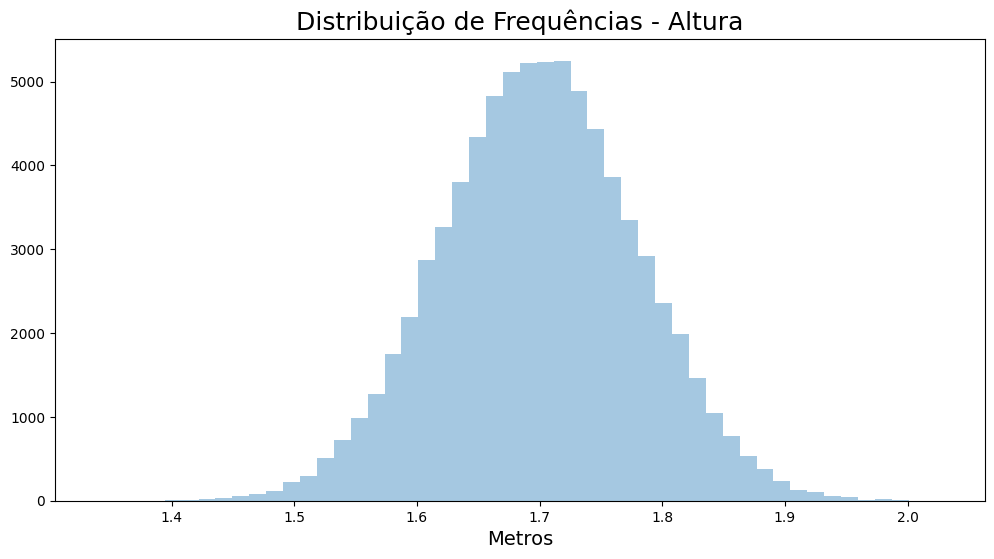

In [64]:
ax = sns.distplot(dados.Altura, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

/tmp/ipykernel_6388/1133179209.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura)


<Axes: title={'center': 'Distribuição de Frequências - Altura - KDE'}, xlabel='Metros', ylabel='Density'>

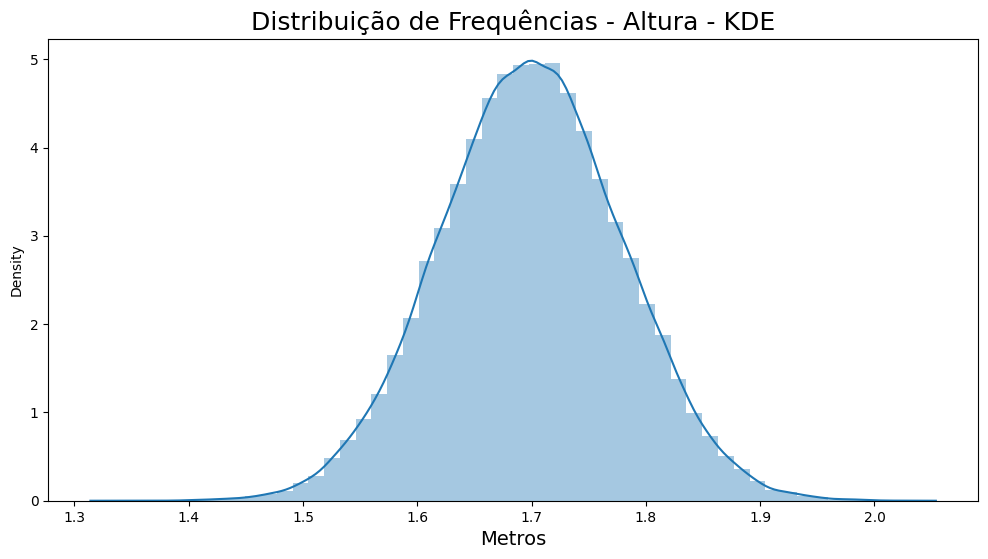

In [63]:
ax = sns.distplot(dados.Altura)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: >

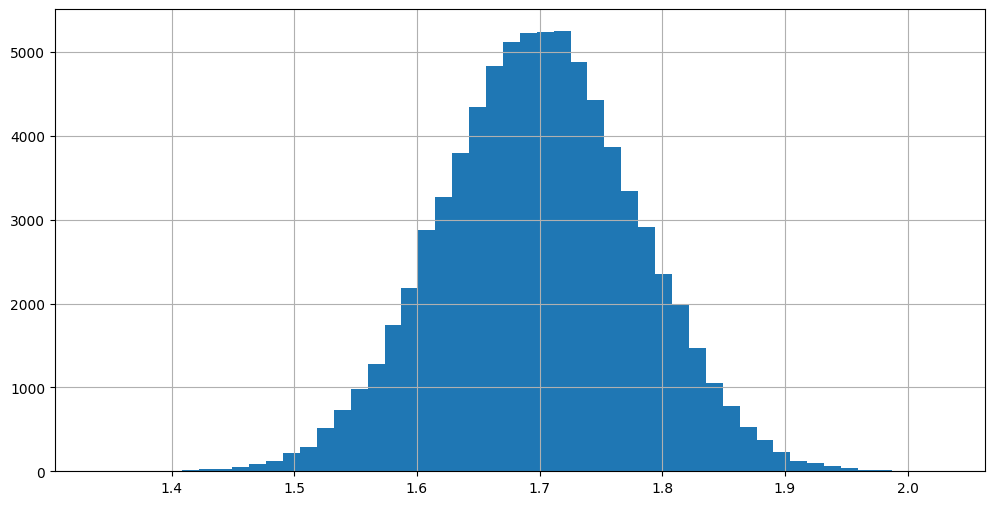

In [67]:
dados.Altura.hist(bins = 50, figsize= (12,6))

<Axes: xlabel='Renda'>

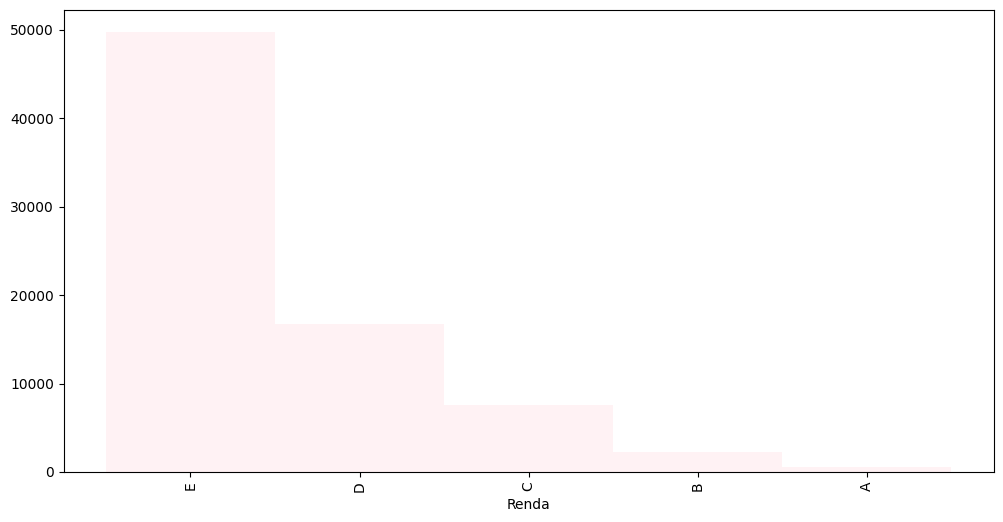

In [70]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width= 1, color="pink", alpha= 0.2, figsize=(12,6))

### Medidas de tendência central